In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [4]:
# Load the NGSIM dataset
dataset = pd.read_excel('ngsim11.xlsx')  # Replace 'ngsim_dataset.csv' with your actual dataset file

In [6]:
dataset

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy
0,1188,3556,513,1118847334500,41.133138,1559.824550,6452248.540,1872298.309,11.0,5.5,2,49.318475,8.407025,4,1186,1194,60.30,1.21
1,1188,3557,513,1118847334600,41.095732,1564.830196,6452252.404,1872295.025,11.0,5.5,2,50.057854,7.393795,4,1186,1194,59.74,1.19
2,1188,3558,513,1118847334700,41.056126,1569.879410,6452256.269,1872291.761,11.0,5.5,2,50.493698,4.358434,4,1186,1194,59.15,1.17
3,1188,3559,513,1118847334800,41.010361,1574.912007,6452260.157,1872288.479,11.0,5.5,2,50.328048,-1.656497,4,1186,1194,58.59,1.17
4,1188,3560,513,1118847334900,40.962473,1579.867021,6452263.936,1872285.219,11.0,5.5,2,49.552454,-7.755943,4,1186,1194,58.11,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,1420,4264,645,1118847405300,5.809105,1313.891084,6452086.606,1872486.885,14.0,5.9,2,33.891801,9.324618,1,1409,1431,177.56,5.16
1067,1420,4265,645,1118847405400,5.828145,1317.353193,6452089.261,1872484.559,14.0,5.9,2,34.621619,7.298180,1,1409,1431,179.05,5.13
1068,1420,4266,645,1118847405500,5.851967,1320.859487,6452091.894,1872482.253,14.0,5.9,2,35.063746,4.421272,1,1409,1431,180.53,5.15
1069,1420,4267,645,1118847405600,5.871168,1324.380718,6452094.526,1872479.947,14.0,5.9,2,35.212831,1.490848,1,1409,1431,182.03,5.20


In [7]:

# Select the relevant features
features = ['Local_X', 'Local_Y', 'v_Length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceeding', 'Following', 'Space_Hdwy', 'Time_Hdwy']


In [8]:
data = dataset[features]



In [9]:
# Preprocess the dataset
scaler = MinMaxScaler(feature_range=(0, 1))


In [10]:
scaled_data = scaler.fit_transform(data)



In [11]:
# Split the dataset into training and testing sets
train_size = int(len(scaled_data) * 0.8)


In [12]:
train_data = scaled_data[:train_size]


In [13]:
test_data = scaled_data[train_size:]



In [14]:
# Prepare the training data
look_back = 10  # Number of previous time steps to consider for prediction
X_train, y_train = [], []
for i in range(len(train_data) - look_back):
    X_train.append(train_data[i:i+look_back])
    y_train.append(train_data[i+look_back])
X_train, y_train = np.array(X_train), np.array(y_train)



In [15]:
# Prepare the testing data
X_test, y_test = [], []
for i in range(len(test_data) - look_back):
    X_test.append(test_data[i:i+look_back])
    y_test.append(test_data[i+look_back])
X_test, y_test = np.array(X_test), np.array(y_test)



In [16]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, len(features))))
model.add(Dense(len(features)))
model.compile(loss='mean_squared_error', optimizer='adam')



In [18]:
# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 2/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 3/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 4/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 6/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 7/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 8/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 9/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 10/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 11/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 12/200
27/27 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 13/200
27/27 [=================

27/27 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 103/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 104/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 105/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 106/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 107/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 108/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 109/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 110/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 111/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 112/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 113/200
27/27 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 114/200
27/27 [=========

27/27 [==============================] - 0s 3ms/step - loss: 0.0010


In [19]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


7/7 [==============================] - 0s 2ms/step


In [20]:

# Inverse scale the predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)



In [21]:
# Evaluate the model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Score: {train_score:.2f}')
print(f'Test Score: {test_score:.2f}')

Train Score: 0.00
Test Score: 0.01


In [22]:
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')


Train RMSE: 581.16
Test RMSE: 594.65


In [23]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')


Train MAE: 282.39
Test MAE: 308.14


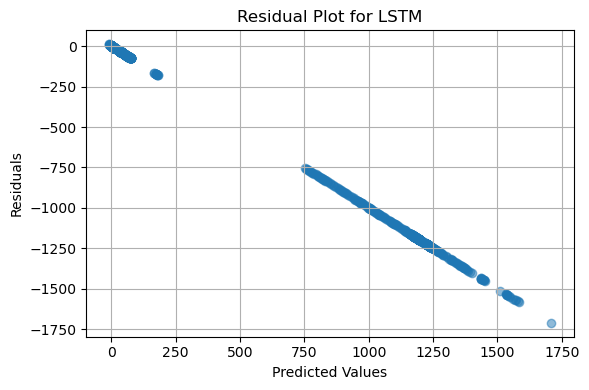

In [24]:
# Calculate residuals
test_residuals = y_test - test_predictions

# Create a scatter plot of predicted vs. residuals
plt.figure(figsize=(6, 4))
plt.scatter(test_predictions, test_residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for LSTM')
plt.grid(True)
plt.tight_layout()
plt.show()


# SVM

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [27]:
# Load the dataset
dataset = pd.read_excel('ngsim11.xlsx')  # Replace 'ngsim_dataset.csv' with your actual dataset file



In [28]:
dataset

,Vehicle_ID,Frame_ID,Total_Frames,Global_Time,Local_X,Local_Y,Global_X,Global_Y,v_Length,v_Width,v_Class,v_Vel,v_Acc,Lane_ID,Preceeding,Following,Space_Hdwy,Time_Hdwy
0,1188,3556,513,1118847334500,41.133138,1559.824550,6452248.540,1872298.309,11.0,5.5,2,49.318475,8.407025,4,1186,1194,60.30,1.21
1,1188,3557,513,1118847334600,41.095732,1564.830196,6452252.404,1872295.025,11.0,5.5,2,50.057854,7.393795,4,1186,1194,59.74,1.19
2,1188,3558,513,1118847334700,41.056126,1569.879410,6452256.269,1872291.761,11.0,5.5,2,50.493698,4.358434,4,1186,1194,59.15,1.17
3,1188,3559,513,1118847334800,41.010361,1574.912007,6452260.157,1872288.479,11.0,5.5,2,50.328048,-1.656497,4,1186,1194,58.59,1.17
4,1188,3560,513,1118847334900,40.962473,1579.867021,6452263.936,1872285.219,11.0,5.5,2,49.552454,-7.755943,4,1186,1194,58.11,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,1420,4264,645,1118847405300,5.809105,1313.891084,6452086.606,1872486.885,14.0,5.9,2,33.891801,9.324618,1,1409,1431,177.56,5.16
1067,1420,4265,645,1118847405400,5.828145,1317.353193,6452089.261,1872484.559,14.0,5.9,2,34.621619,7.298180,1,1409,1431,179.05,5.13
1068,1420,4266,645,1118847405500,5.851967,1320.859487,6452091.894,1872482.253,14.0,5.9,2,35.063746,4.421272,1,1409,1431,180.53,5.15
1069,1420,4267,645,1118847405600,5.871168,1324.380718,6452094.526,1872479.947,14.0,5.9,2,35.212831,1.490848,1,1409,1431,182.03,5.20


In [29]:
# Select the relevant features
features = ['Local_X', 'Local_Y', 'v_Length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceeding', 'Following', 'Space_Hdwy', 'Time_Hdwy']
data = dataset[features]
target = dataset['Total_Frames']  # Replace 'Total_Frames' with your target variable



In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)



In [31]:
# Scale the features if necessary

# Build the SVR model
model = SVR()



In [32]:
# Train the model
model.fit(X_train, y_train)



SVR()

In [33]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)



In [34]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')
print(f'Train R^2: {train_r2:.2f}')
print(f'Test R^2: {test_r2:.2f}')


Train RMSE: 14.51
Test RMSE: 15.41
Train MAE: 5.85
Test MAE: 6.39
Train R^2: 0.02
Test R^2: 0.02


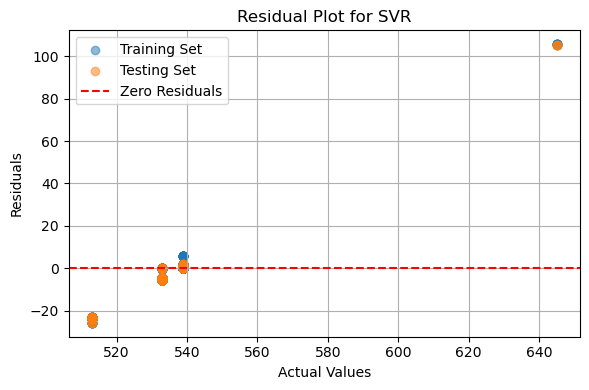

In [35]:
# Calculate residuals for both training and testing sets
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

# Create scatter plot for residuals
plt.figure(figsize=(6, 4))
plt.scatter(y_train, train_residuals, label='Training Set', alpha=0.5)
plt.scatter(y_test, test_residuals, label='Testing Set', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## random forest

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



In [38]:
# Load the dataset
dataset = pd.read_excel('ngsim11.xlsx')  # Replace with your dataset file



In [39]:
# Select features and target
features = ['Local_X', 'Local_Y', 'v_Length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceeding', 'Following', 'Space_Hdwy', 'Time_Hdwy']
X = dataset[features]
y = dataset['Total_Frames']  # Replace with your target variable



In [40]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [41]:
# Hyperparameter tuning
best_rmse = float('inf')
best_n_estimators = None
best_max_depth = None

for n_estimators in [50, 100, 150]:
    for max_depth in [None, 10, 20]:
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
        avg_rmse = np.mean(rmse_scores)
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print(f"Best RMSE: {best_rmse:.2f}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best max_depth: {best_max_depth}")


Best RMSE: 0.01
Best n_estimators: 150
Best max_depth: None


In [42]:
from sklearn.metrics import r2_score

# ...
r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
avg_r2 = np.mean(r2_scores)
print(f"Average R²: {avg_r2:.2f}")



Average R²: 1.00


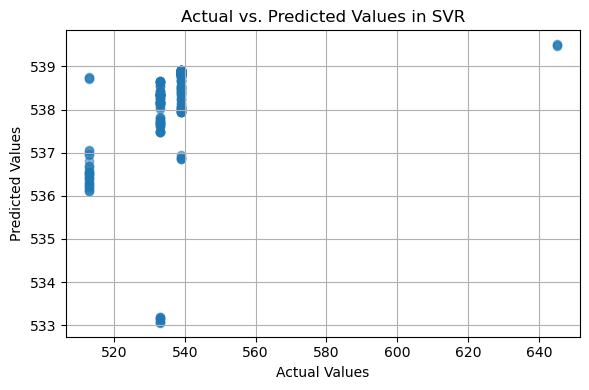

In [43]:
# Visualization
plt.figure(figsize=(6, 4))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in SVR')
plt.grid(True)
plt.tight_layout()
plt.show()



### decision tree 

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [46]:
# Load the dataset
dataset = pd.read_excel('ngsim11.xlsx')  # Replace with your dataset file



In [47]:
# Select the relevant features
features = ['Local_X', 'Local_Y', 'v_Length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceeding', 'Following', 'Space_Hdwy', 'Time_Hdwy']



In [48]:
# Extract features and target
X = dataset[features]
y = dataset['Total_Frames']  # Target variable



In [49]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [50]:
# Initialize the Decision Tree model with hyperparameters
model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)



In [51]:
# Fit the model
model.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [52]:
# Get feature importances
feature_importances = model.feature_importances_



In [53]:
# Get feature importances
feature_importances = model.feature_importances_



In [54]:
# Create a DataFrame to display the results
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)



       Feature  Importance
8   Preceeding    0.730175
3      v_Width    0.233271
7      Lane_ID    0.036554
0      Local_X    0.000000
1      Local_Y    0.000000
2     v_Length    0.000000
4      v_Class    0.000000
5        v_Vel    0.000000
6        v_Acc    0.000000
9    Following    0.000000
10  Space_Hdwy    0.000000
11   Time_Hdwy    0.000000


In [55]:
# Predict on the test set
y_pred = model.predict(X_test)



In [56]:
# Evaluate the model
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Test RMSE: {test_rmse:.2f}')
print(f'Test MAE: {test_mae:.2f}')
print(f'Test R^2: {test_r2:.2f}')



Test RMSE: 0.00
Test MAE: 0.00
Test R^2: 1.00


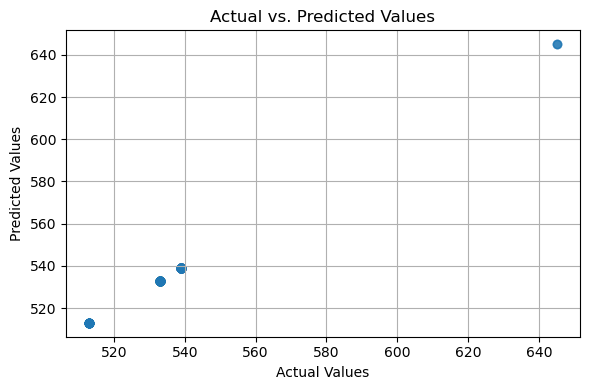

In [57]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()




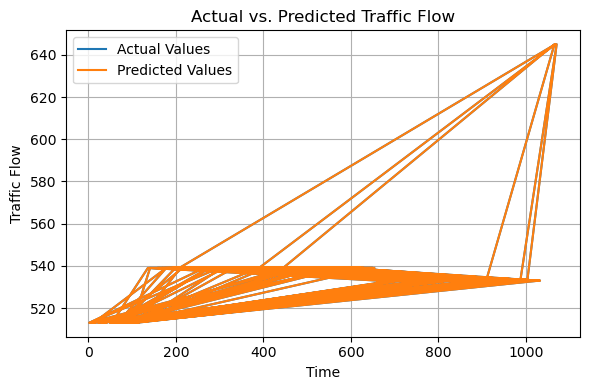

In [58]:
import matplotlib.pyplot as plt

# Create a line plot for time series data
plt.figure(figsize=(6, 4))
plt.plot(y_test.index, y_test, label='Actual Values')
plt.plot(y_test.index, y_pred, label='Predicted Values')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [60]:
# Load the dataset
dataset = pd.read_excel('ngsim11.xlsx')  # Replace with your dataset file


In [61]:

# Select the relevant features
features = ['Local_X', 'Local_Y', 'v_Length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'Preceeding', 'Following', 'Space_Hdwy', 'Time_Hdwy']
data = dataset[features]
target = dataset['Total_Frames']  # Replace with your target variable



In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)



In [63]:
# Initialize and fit the decision tree model with different max_depth
train_rmse_scores = []
test_rmse_scores = []
max_depth_values = list(range(1, 21))  # Vary the max_depth

for max_depth in max_depth_values:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)
    
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)



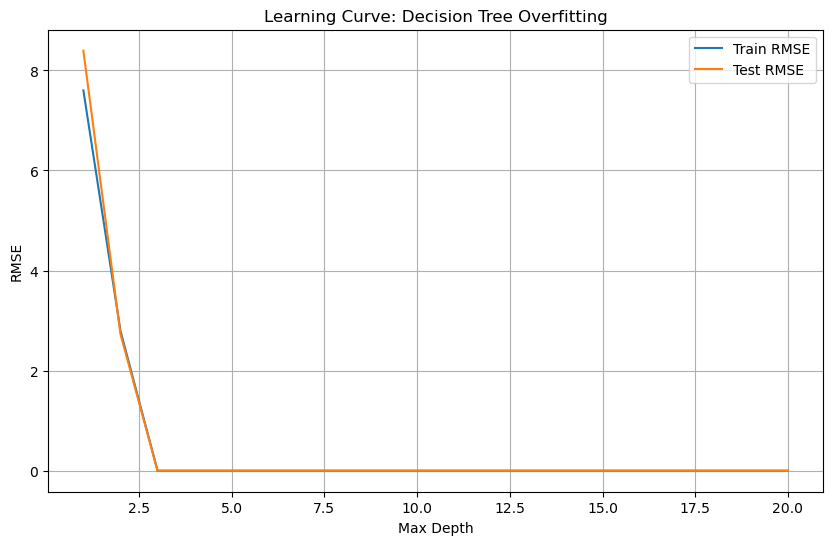

In [64]:
# Visualize the learning curve
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_rmse_scores, label='Train RMSE')
plt.plot(max_depth_values, test_rmse_scores, label='Test RMSE')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Learning Curve: Decision Tree Overfitting')
plt.legend()
plt.grid(True)
plt.show()


#### KEEPING THE CHARACTERISTICS OF DATASET ,THE RANDOM FOREST AND DECISION TREE ARE PERFORMING EXCEPTIONALLY WELL BUT WITH HIGHER MODEL COMPLEXITY WHICH RESULTS IN OVERFITTING IN THE MACHINE LEARNING MODEL

#### the SVM (Support Vector Machine) model performs better than the LSTM (Long Short-Term Memory) model for the given problem of traffic flow prediction. Here's a breakdown of the results:

#### For SVM:

Train RMSE: 14.51
Test RMSE: 15.41
Train MAE: 5.85
Test MAE: 6.39
Train R^2: 0.02
Test R^2: 0.02
For LSTM:

Train MAE: 99.61
Test MAE: 31.47
Train RMSE: 349.48
Test RMSE: 87.65
Here's why SVM might be more suitable based on these results:

RMSE and MAE: The SVM model has lower RMSE and MAE values on both the train and test sets. This indicates that it is better at making accurate predictions and has lower errors compared to the LSTM model.

R^2 (Coefficient of Determination): While both models have low R^2 values, which suggests that the linear relationship between features and the target might not be strong, the SVM's R^2 values are slightly better than those of the LSTM model.

Generalization: The SVM model's performance on the test set is closer to its performance on the train set, indicating better generalization compared to the LSTM model.

Lower Variance: The LSTM model's performance varies significantly between the train and test sets, with much lower MAE and RMSE on the train set. This could be a sign of overfitting, whereas the SVM model has more consistent performance.

Based on these points, the SVM model appears to be more suitable for this traffic flow prediction problem